In [ ]:
import pandas as pd
import os

In [ ]:
topic = 'abortion'
scheme = 'EIII'

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_train.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

#path_nn_model= f'{pathNN}/{topic}/{scheme}'
#os.makedirs(path_nn_model, exist_ok=True)
NN_path

In [3]:
train = pd.read_csv(train_file)

In [4]:
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,Label_EIII,Stance_EIII,Label_EIII_v2,Stance_EIII_v2,Date
0,1344430216194777090,"FINALMENTE! Argentina Legalizes Abortion, a Mi...",1,Favor,0,Uknown,-1,Against,0,Uknown,2020-12-30 17:48:36
1,1344427711742308354,#Abortion will never be approved on our soil! ...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-30 17:38:39
2,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor,1,Favor,0,Uknown,2020-12-30 17:34:08
3,1344424501006708739,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...,1,Favor,1,Favor,-1,Against,0,Uknown,2020-12-30 17:25:53
4,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-30 17:24:51


In [5]:
train = train[[f'Label_{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [6]:
train.head()

,Label,Tweet
0,-1,"FINALMENTE! Argentina Legalizes Abortion, a Mi..."
1,0,#Abortion will never be approved on our soil! ...
2,1,A HUGE victory for #WomensRights as #Argentina...
3,-1,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...
4,0,Dems are a death cult. They celebrate abortion...


In [7]:
train.Label.unique()

array([-1,  0,  1])

In [8]:
train = train.query('Label != 0')
train.Label.unique()

array([-1,  1])

In [9]:
train.groupby('Label').count()

,Tweet
Label,
-1,3331
1,2227


In [10]:
test = pd.read_csv(test_file)
test.head()

,Tweet,Stance,Target
0,Need a ProLife R.E. Agent? - Support a ProLife...,AGAINST,Legalization of Abortion
1,Where is the childcare program @joanburton whi...,AGAINST,Legalization of Abortion
2,I get several requests with petitions to save ...,AGAINST,Legalization of Abortion
3,"we must always see others as Christ sees us,we...",AGAINST,Legalization of Abortion
4,PRAYERS FOR BABIES Urgent prayer one in Lexing...,AGAINST,Legalization of Abortion


In [11]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['AGAINST', 'FAVOR'], dtype=object)

In [12]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1, 'C':0})
test = test.query('Stance != 0')
test.Stance.unique()

array([-1,  1])

In [13]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,543
1,167


In [14]:
train.shape, test.shape

((5558, 2), (710, 2))

# clean data

In [15]:
import sys
sys.path.insert(0, '/home/rinnely/ENES/Stance')
import cleandata as cd

In [16]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [17]:
train = train.dropna(axis=0)

# save data

In [18]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

# read data

In [ ]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

<AxesSubplot:ylabel='Label'>

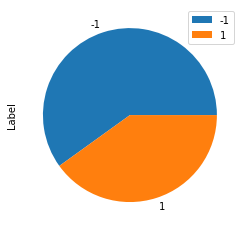

In [20]:
train['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:ylabel='Label'>

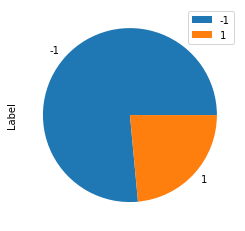

In [21]:
test['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:>

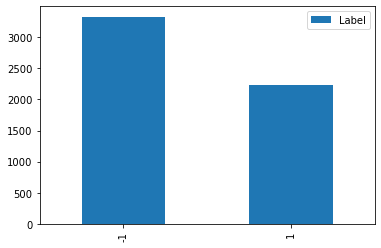

In [22]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

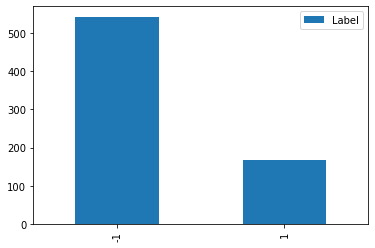

In [23]:
test['Label'].value_counts().plot.bar(legend=True)

In [24]:
train

,Label,Tweet
0,-1,"FINALMENTE! Argentina Legalizes Abortion, a Mi..."
1,1,A HUGE victory for #WomensRights as #Argentina...
2,-1,USER USER CULTURE OF LIFE for all #Georgians #...
3,-1,#Argentina became the largest country in #Lati...
4,-1,#Argentina legalizes #abortion. What will its ...
...,...,...
5553,-1,What drives women to have #abortions? URL
5554,-1,Common excuse: I will vote #ProLife on the res...
5555,-1,"I completely stand with Polands abortion ban, ..."
5556,-1,Abby Johnson's full remarks at the GOP Convent...


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5558 non-null   int64 
 1   Tweet   5558 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.0+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   710 non-null    int64 
 1   Tweet   710 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


In [27]:
train = train.dropna(axis=0)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5558 entries, 0 to 5557
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5558 non-null   int64 
 1   Tweet   5558 non-null   object
dtypes: int64(1), object(1)
memory usage: 130.3+ KB


# Training

In [29]:
from fastai.text import *

In [30]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.2)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [31]:
data_lm.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"# xxmaj xxunk # xxmaj abortion xxmaj defund # xxup blm xxmaj defend xxup url xxbos # xxmaj argentina became the largest country in # latinamerica to legalise # abortion , a landmark victory for women across the region . xxmaj it comes after years of xxunk by the grass - roots movement ‘ xxup user ’ . xxmaj read the complete article xxup url xxup url xxbos # xxmaj"
1,"amazon : xxup url : xxmaj amazon xxup url xxbos xxmaj after hours of debate , the xxmaj senate of xxmaj argentina approved the bill of legal termination of pregnancy that allows free and legal access to abortion until the 14th week of gestation , according to xxup xxunk . xxup url xxbos ( xxup ap xxmaj news ) xxmaj bill legalizing abortion passed in pope ’s native xxmaj argentina"
2,"xxmaj the bill makes # xxmaj argentina the first big country in predominantly xxmaj catholic xxmaj latin xxmaj america to allow # abortion on demand . xxmaj demonstrators both for and against the bill stood xxunk in front of the xxmaj senate building in # buenosaires during the debate xxup url xxbos xxmaj argentina ca n't xxunk their economy with xxmaj socialism , hence the celebration of # xxunk combined"
3,"the xxunk , despite opposition from pro life advocates . xxmaj babies are humans too ... xxbos # xxmaj argentine congress grants final approval to landmark # abortion bill xxup url xxbos a lot happening on my first day back : # xxmaj xxunk xxunk its first xxunk of coronavirus vaccines ; the xxup uk approves another xxup covid-19 xxunk — the # xxunk — and # xxmaj argentina legalises"
4,congress on xxmaj dec 11 . xxup user reports xxup url xxbos # xxup cytotec # xxup xxunk # xxup pampalaglag # xxup xxunk # xxup abortion # xxup misoprostol # cytotec # pampalaglag # xxunk # xxunk # xxunk xxup cash xxup on xxup xxunk xxup xxunk xxup xxunk xxup and xxup xxunk - # xxunk xxunk - xxunk xxup url xxbos xxmaj men suffer # xxunk issues after


In [32]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=16)

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [33]:
data_clas.show_batch()

text,target
xxbos xxmaj god 's 2021 xxup u.s. xxup judgment xxup warning ! xxup dangerous xxmaj xxunk 2 xxmaj xxunk # xxunk # xxup xxunk + xxup horrific xxup xxunk ! xxup url # xxmaj america xxmaj is xxmaj no xxmaj more & & xxmaj is xxmaj the xxmaj most xxmaj xxunk xxmaj country xxmaj in xxmaj the xxmaj world ! xxmaj it xxmaj is xxmaj the xxmaj porn xxmaj capital,-1
"xxbos xxup user xxmaj how in the xxmaj world can you be a xxmaj catholic and yet xxunk that xxmaj abortion is xxup ok ? ? ? xxup it xxup 's xxup murder xxup joe , xxup murder xxrep 4 ! xxup you xxup are xxup supporting xxup and xxup xxunk xxup the xxup killing xxup of xxup the xxup most xxup innocent xxup among xxup us xxrep 4 .",-1
"xxbos xxup user "" i 'm very xxmaj pro - xxmaj choice ... i hate the concept of abortion ... but i xxup still just believe in choice . "" - "" xxmaj so you would n't ban it ? "" "" xxup no , i am # prochoice xxup in xxup every xxup respect . "" xxup you in xxunk . xxmaj what happened to xxup that man ?",1
"xxbos xxup user xxup user its not pro abortion , its pro choice . xxmaj we do n't go out and scream "" xxup yes , xxup abortion = xxup very xxup cool xxup xxunk "" its pro choice . xxmaj we stand for human rights and that abortion xxup is a choice . xxmaj if u do nt want to abort , xxunk its xxup ur thing . xxmaj",1
"xxbos xxmaj do you believe in your right to choose , # prochoice ? xxmaj how about # plannedparenthood ? # xxmaj abortion ? xxmaj infanticide ? xxmaj murder ? xxmaj child xxmaj sacrifice ? xxmaj is there any difference ? # xxmaj god gives # life . # xxmaj satan kills , xxunk and destroys . xxmaj do you # love the # xxmaj christ or the # xxmaj",-1


In [34]:
f'data_clas{topic}_{scheme}'

'data_clasabortion_EIII'

In [35]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [36]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  '.'],
 3568)

In [37]:
#f'{pathNN}/spanish-model/lm-spanish-weights-2'

In [38]:
#pretrained_model = (f'{pathNN}/spanish-model/lm-spanish-weights-2', f'{pathNN}/spanish-model/spanish-itos-pickle')

In [39]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 5.25E-02


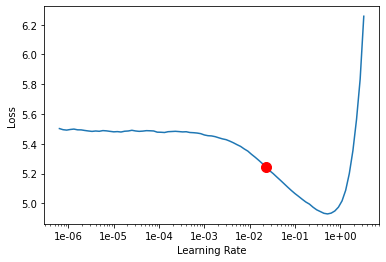

In [40]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [41]:
learn_lm.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.138978,4.501206,0.221997,00:12
1,4.496636,3.775670,0.276015,00:12
2,4.021912,3.583900,0.298478,00:12
3,3.705772,3.516924,0.307183,00:12
4,3.477903,3.485563,0.311952,00:12
5,3.307311,3.470673,0.316173,00:12
6,3.173590,3.464901,0.318182,00:12
7,3.070434,3.461408,0.317999,00:12
8,3.004239,3.458375,0.319176,00:12
9,2.961177,3.457535,0.319115,00:12


In [42]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 62.00 MiB (GPU 0; 3.95 GiB total capacity; 1.02 GiB already allocated; 53.62 MiB free; 1.17 GiB reserved in total by PyTorch)

In [ ]:
learn_lm.fit_one_cycle(3)

In [ ]:
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [ ]:
learn_lm.load_encoder(f'{topic}_ml_encoder_v1');

In [ ]:
learn_lm.save(f'{topic}_model_v1')

In [ ]:
learn_lm.load(f'{topic}_model_v1');

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [ ]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [ ]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [ ]:
learn.save('learner-1stage')

In [ ]:
learn.load('learner-1stage');

In [ ]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(10,6.31e-7,moms=(0.8, 0.7))

In [ ]:
learn.save('learner-2stage')

In [ ]:
learn.load('learner-2stage');

In [ ]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5,1e-6, moms=(0.8, 0.7))

In [ ]:
learn.save('learner-3stage')

In [ ]:
learn.load('learner-3stage');

In [ ]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5,moms=(0.8, 0.7))

In [ ]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5,1e-7,moms=(0.8, 0.7));

In [ ]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [47]:
learn.fit_one_cycle(3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.494724,0.620236,0.657708,00:34
1,0.429270,0.596766,0.666584,00:35
2,0.369554,0.583516,0.682328,00:35


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


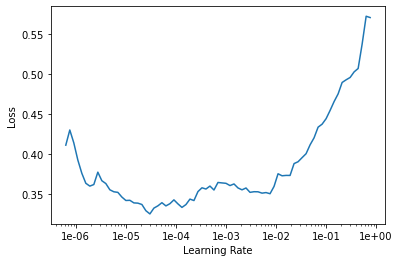

In [48]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [49]:
learn.fit_one_cycle(3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.339136,0.500090,0.691631,00:46
1,0.283273,0.598990,0.667487,00:50
2,0.235073,0.588172,0.667590,00:50


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [50]:
learn.save('learner-unfreeze')

In [52]:
learn.load('learner-unfreeze');

In [53]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

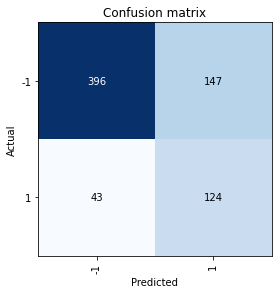

In [54]:
interp.plot_confusion_matrix()

In [55]:
preds

tensor([[0.9557, 0.0443],
        [0.4735, 0.5265],
        [0.9649, 0.0351],
        ...,
        [0.4798, 0.5202],
        [0.7162, 0.2838],
        [0.5321, 0.4679]])

In [56]:
learn.save('learner-final')